In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
md=pd.read_csv(r'C:\Users\hp\Downloads\micro credit defaulter.csv')
md.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

       pdate  
0  7/20/2016  
1  8/10/2016  
2  8/19/2016  
3   6/6/2016  
4  6/22/2016  

[5 rows x 37 columns]

In [3]:
md.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [4]:
md.shape

(209593, 37)

In [5]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
md.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
md=md.drop(['Unnamed: 0','pdate','msisdn'],axis=1)

In [8]:
md.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   pcircle  
0      UPW  
1      UPW  
2      UPW  
3      UPW  
4      UPW  

[5 rows x 34 columns]

In [9]:
md.shape

(209593, 34)

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in md.columns:
    if md[i].dtype=="object":
        md[i]=enc.fit_transform(md[i].values.reshape(-1,1))

In [11]:
md.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   pcircle  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 34 columns]

1    183431
0     26162
Name: label, dtype: int64


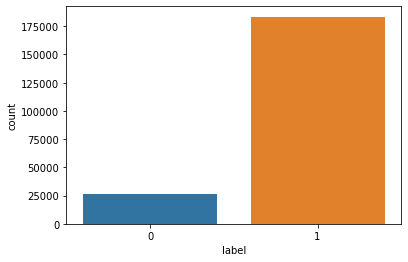

In [12]:
sns.countplot(x='label',data=md)
print(md['label'].value_counts())

In [13]:
sns.countplot(x='pcircle',data=md)
print(md['pcircle'].value_counts())

0.0    209593
Name: pcircle, dtype: int64


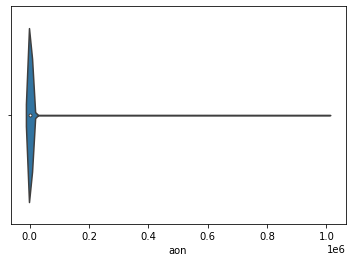

In [14]:
sns.violinplot(x='aon',data=md)
plt.show()

In [15]:
sns.violinplot(x='daily_decr90',data=md)
plt.show()

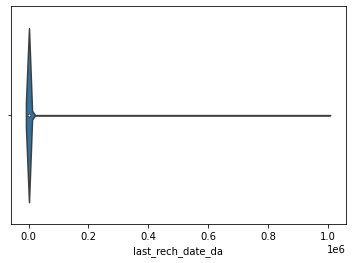

In [16]:
sns.violinplot(x='last_rech_date_da',data=md)
plt.show()

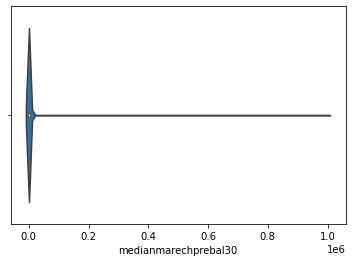

In [17]:
sns.violinplot(x='medianmarechprebal30',data=md)
plt.show()

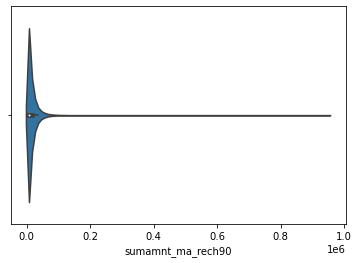

In [18]:
sns.violinplot(x='sumamnt_ma_rech90',data=md)
plt.show()

In [19]:
sns.violinplot(x='amnt_loans30',data=md)
plt.show()

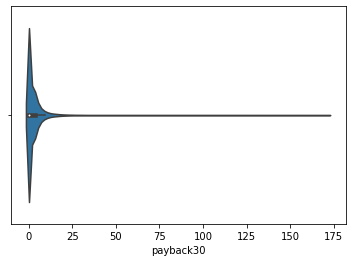

In [20]:
sns.violinplot(x='payback30',data=md)
plt.show()

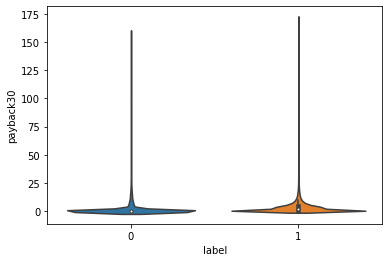

In [21]:
sns.violinplot(x='label',y='payback30',data=md)
plt.show()

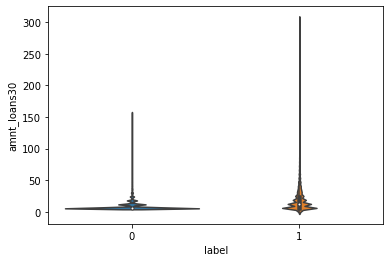

In [22]:
sns.violinplot(x='label',y='amnt_loans30',data=md)
plt.show()

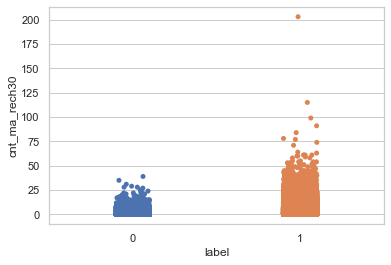

In [23]:
sns.set(style='whitegrid')
sns.stripplot(x='label',y='cnt_ma_rech30',data=md)
plt.show()

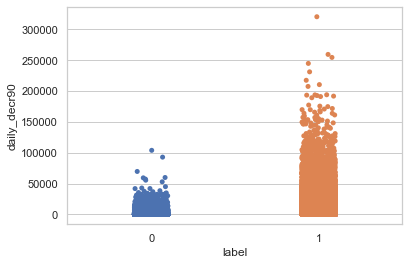

In [24]:
sns.set(style='whitegrid')
sns.stripplot(x='label',y='daily_decr90',data=md)
plt.show()

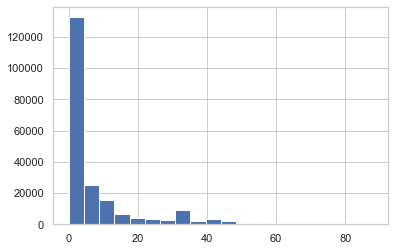

In [25]:
md.fr_ma_rech90.hist(bins=20)

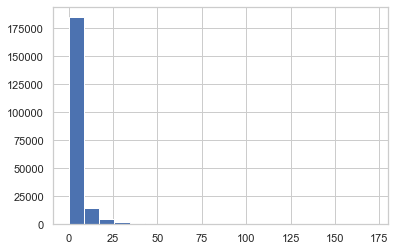

In [26]:
md.payback90.hist(bins=20)

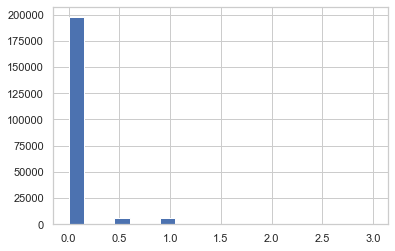

In [27]:
md.medianamnt_loans90.hist(bins=20)

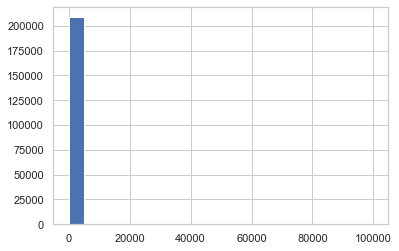

In [28]:
md.maxamnt_loans30.hist(bins=20)

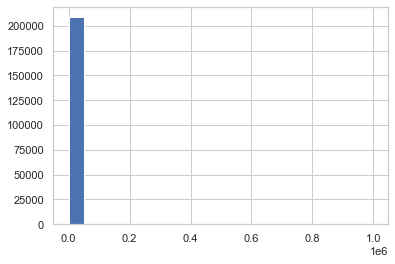

In [29]:
md.last_rech_date_da.hist(bins=20)

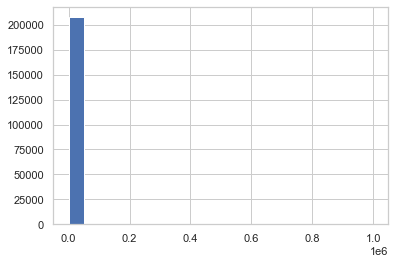

In [30]:
md.aon.hist(bins=20)

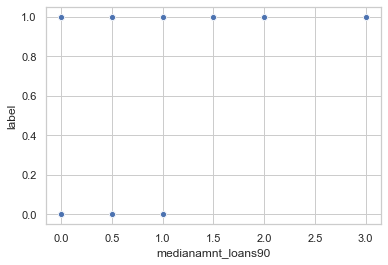

In [31]:
sns.scatterplot(x='medianamnt_loans90',y='label',data=md)

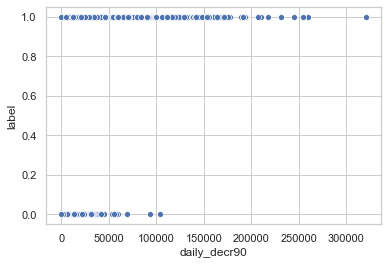

In [32]:
sns.scatterplot(x='daily_decr90',y='label',data=md)

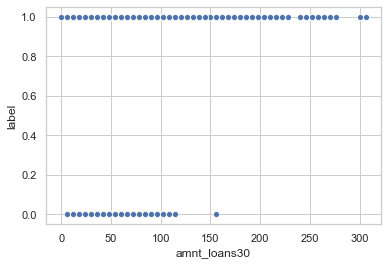

In [33]:
sns.scatterplot(x='amnt_loans30',y='label',data=md)

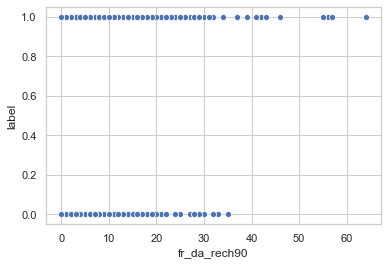

In [34]:
sns.scatterplot(x='fr_da_rech90',y='label',data=md)

In [35]:
md.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755200  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000       209593.00000      209593.000000   
mean     2692.581910    3483.406534         3755.84780        3712.202921   
std      4308.586781    5770.461279        53905.89223       53374.833430   
min    -23737.140000  -24720.580000          -29.00000         -29.000000   
25%       280.420000     300.260000            1.00000           0.000000   
50%      1083.570000    1334.000000            3.00000           0.000000   
75%      3356.940000    4201.790000            7.00000           0.000000   
max    198926.110000  200148.110000       998650.37770      999171.809400   

       last_rech_amt_ma  cnt_ma_rech30  ...   amnt_loans30  maxamnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000    209593.000000   
mean        2064.452797       3.978057  ...      17.952021       274.658747   
std         2370.786034       4.256090  ...      17.379741      4245.264648   
min            0.000000       0.000000  ...       0.000000         0.000000   
25%          770.000000       1.000000  ...       6.000000         6.000000   
50%         1539.000000       3.000000  ...      12.000000         6.000000   
75%         2309.000000       5.000000  ...      24.000000         6.000000   
max        55000.000000     203.000000  ...     306.000000     99864.560860   

       medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count       209593.000000  209593.000000  209593.000000    209593.000000   
mean             0.054029      18.520919      23.645398         6.703134   
std              0.218039     224.797423      26.469861         2.103864   
min              0.000000       0.000000       0.000000         0.000000   
25%              0.000000       1.000000       6.000000         6.000000   
50%              0.000000       2.000000      12.000000         6.000000   
75%              0.000000       5.000000      30.000000         6.000000   
max              3.000000    4997.517944     438.000000        12.000000   

       medianamnt_loans90      payback30      payback90   pcircle  
count       209593.000000  209593.000000  209593.000000  209593.0  
mean             0.046077       3.398826       4.321485       0.0  
std              0.200692       8.813729      10.308108       0.0  
min              0.000000       0.000000       0.000000       0.0  
25%              0.000000       0.000000       0.000000       0.0  
50%              0.000000       0.000000       1.666667       0.0  
75%              0.000000       3.750000       4.500000       0.0  
max              3.000000     171.500000     171.500000       0.0  

[8 rows x 34 columns]

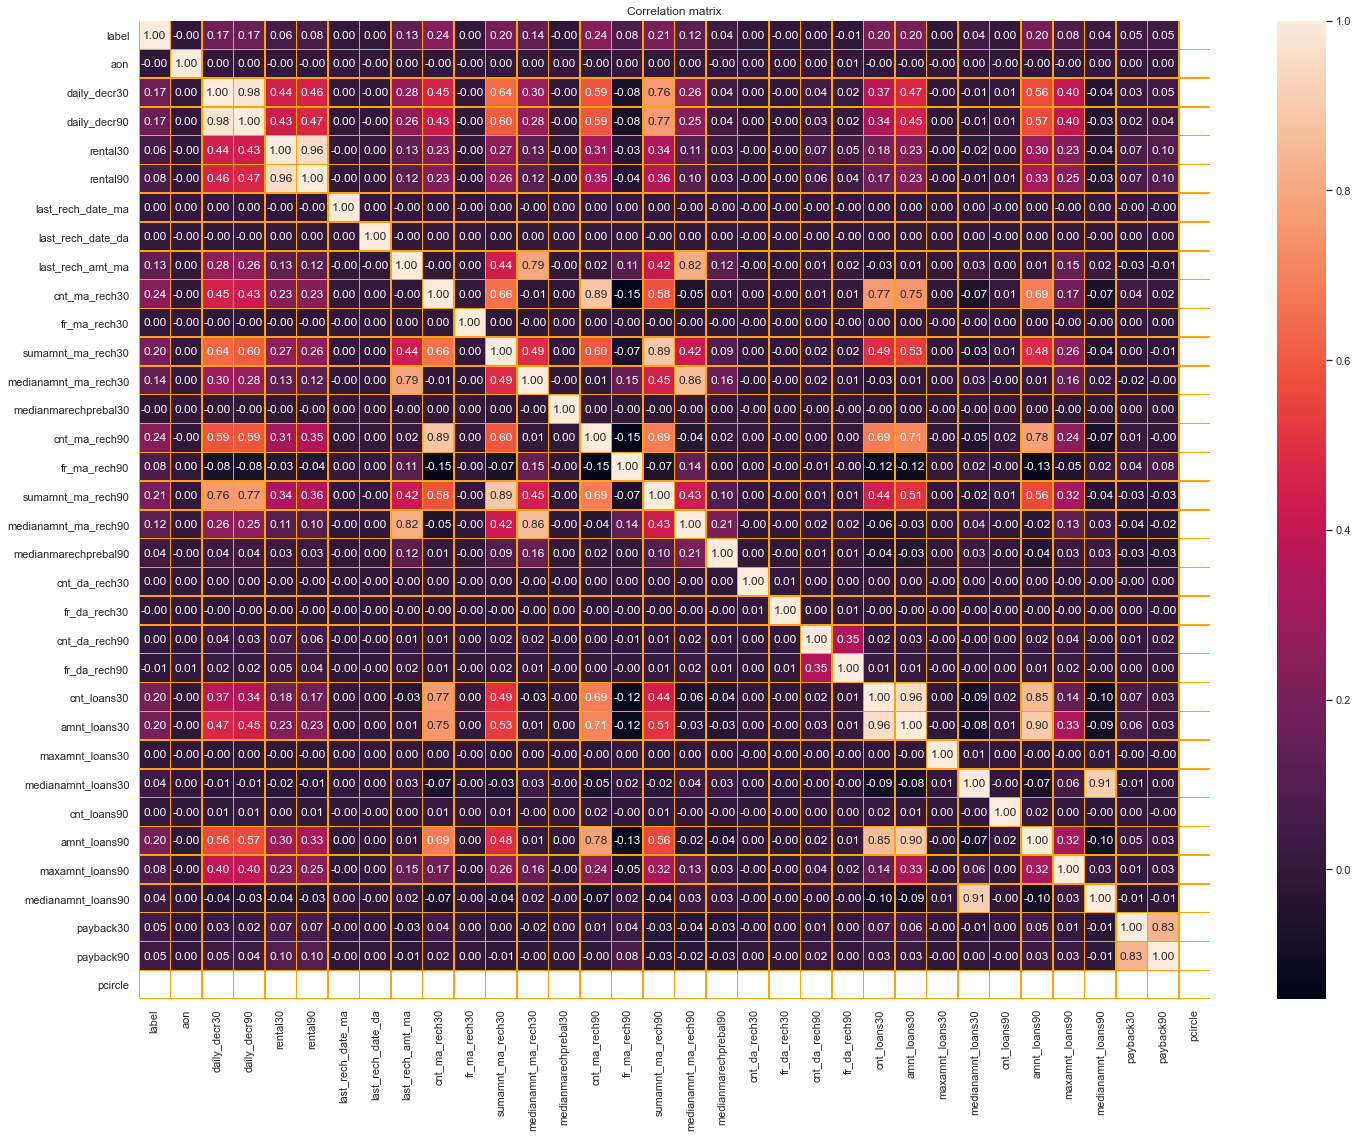

In [36]:
corr=md.corr()                                               # multivariate analysis
plt.figure(figsize=(24,18))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

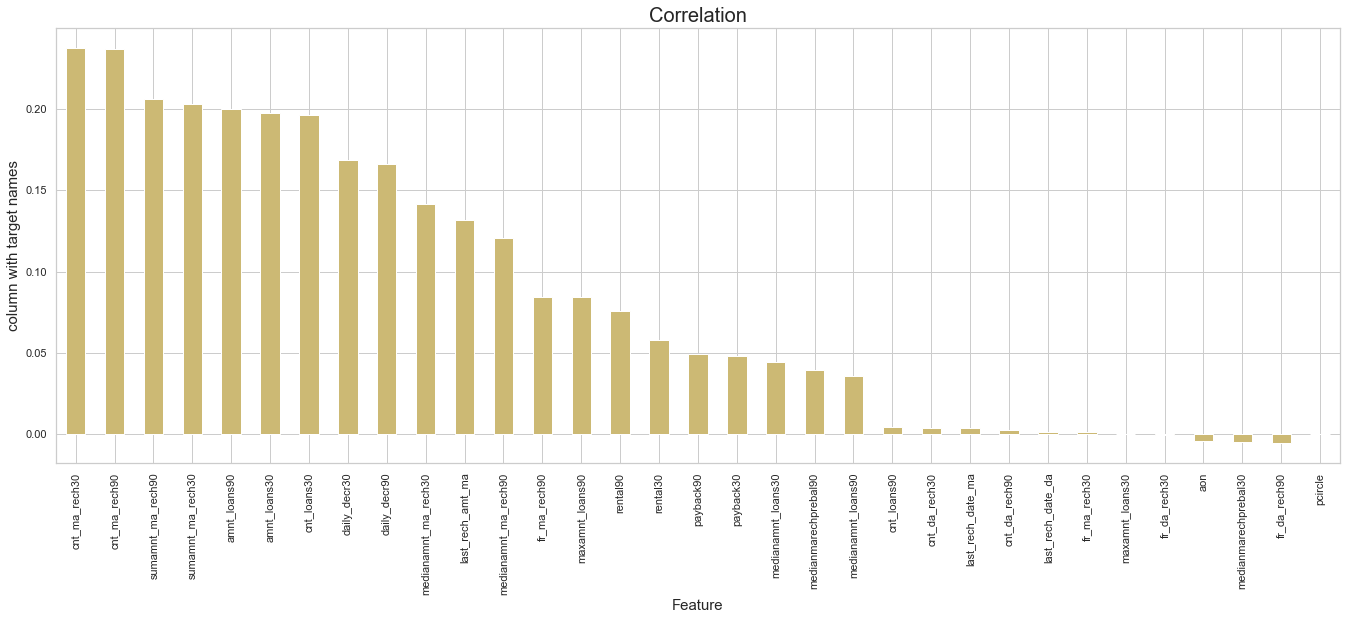

In [37]:
plt.figure(figsize=(23,8))
md.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

In [38]:
md.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

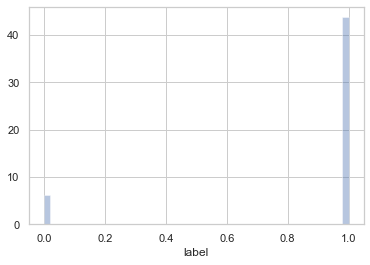

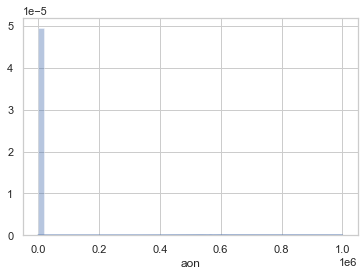

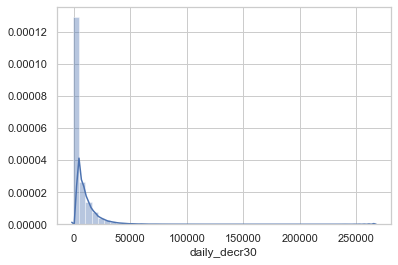

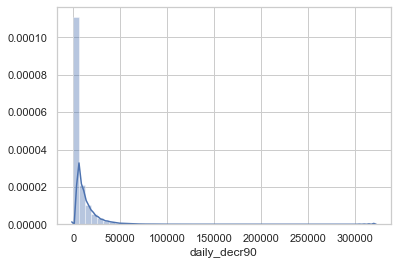

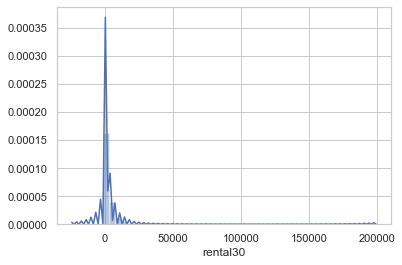

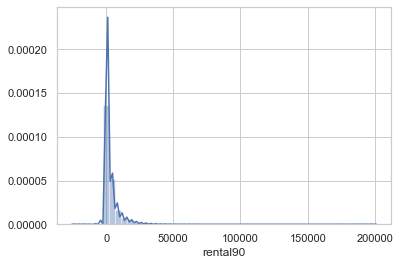

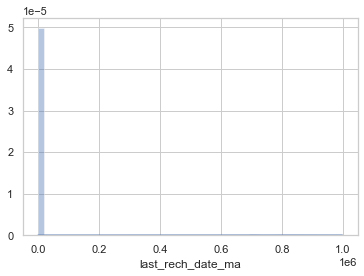

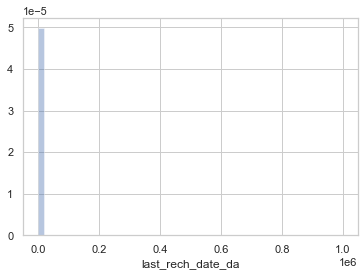

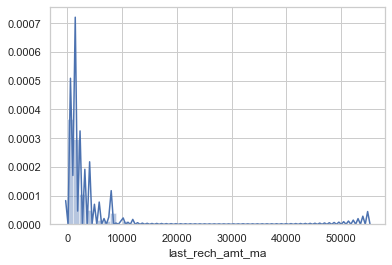

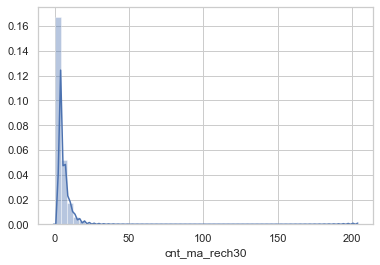

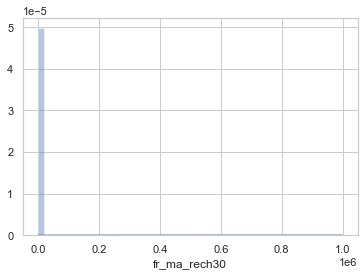

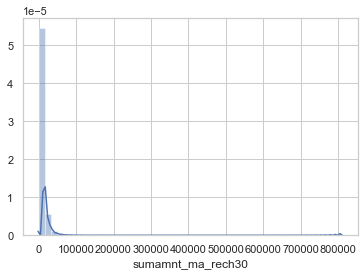

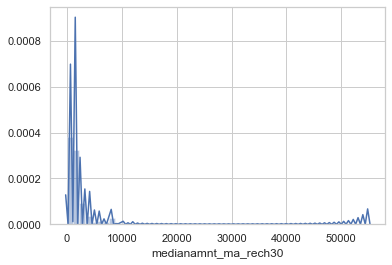

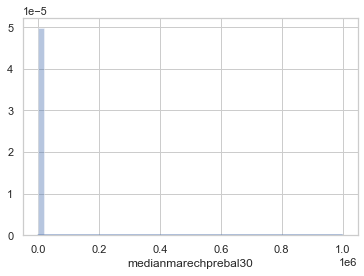

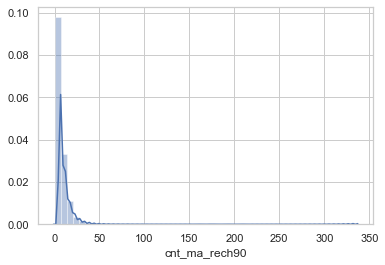

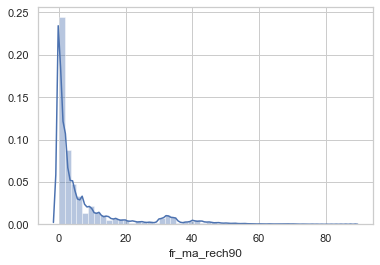

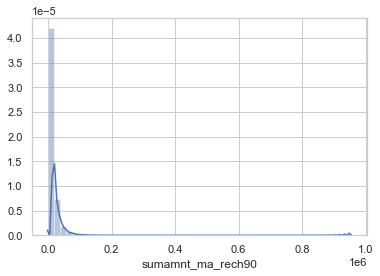

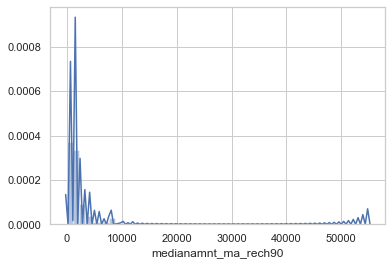

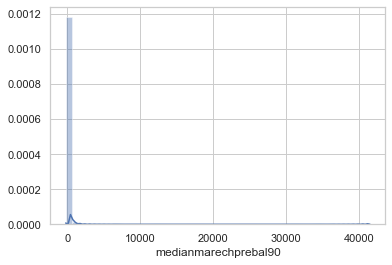

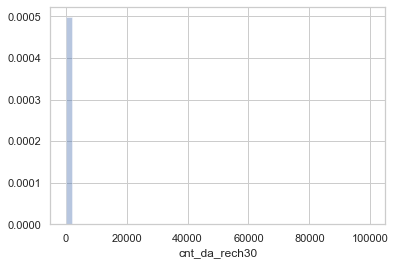

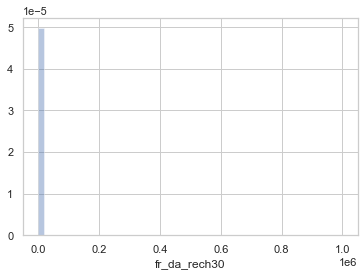

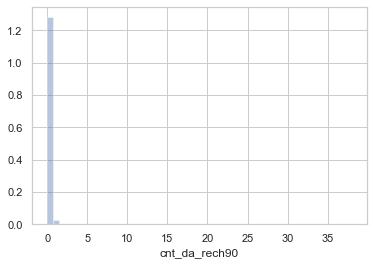

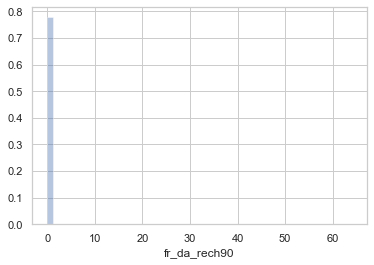

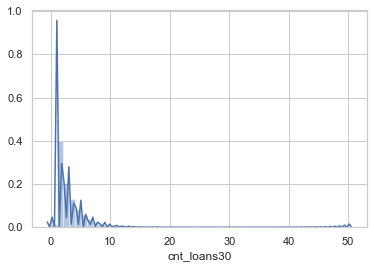

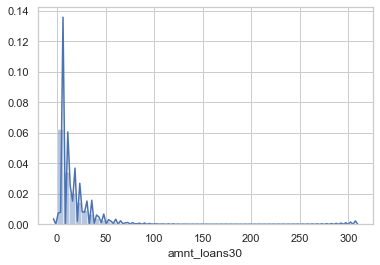

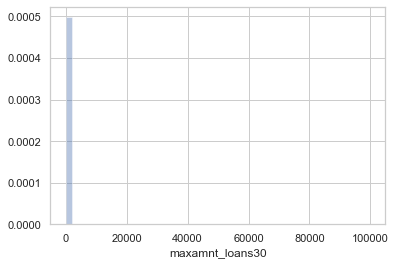

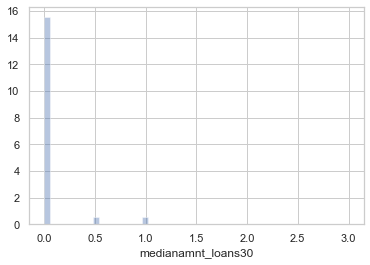

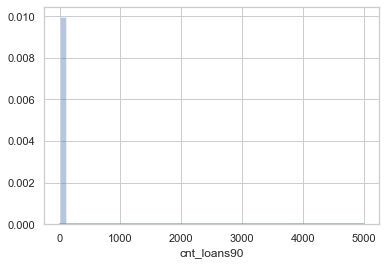

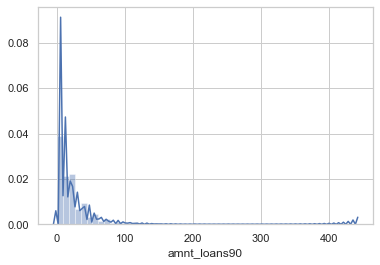

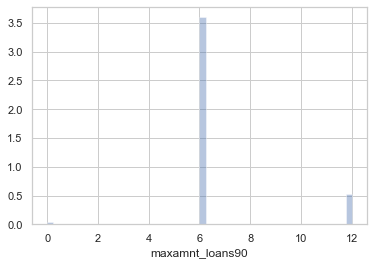

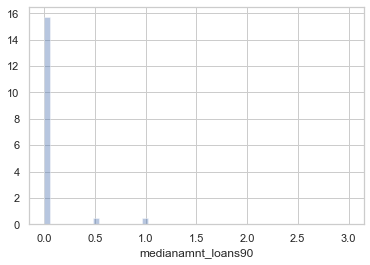

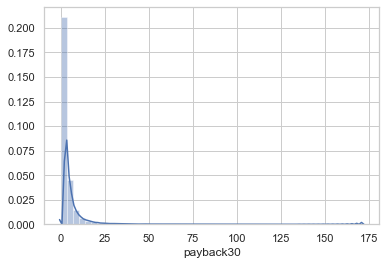

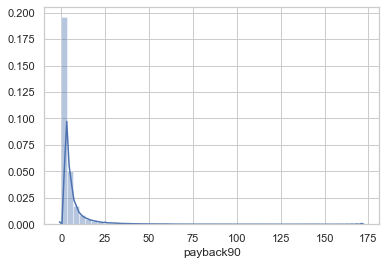

In [39]:
for j in md.columns:
    plt.figure()
    sns.distplot(md[j])

In [40]:
cor=md.corr()
cor['label'].sort_values(ascending=True)

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003785
fr_da_rech30           -0.000027
maxamnt_loans30         0.000248
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002999
last_rech_date_ma       0.003728
cnt_da_rech30           0.003827
cnt_loans90             0.004733
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044589
payback30               0.048336
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
medianamnt_ma_rech30    0.141490
daily_decr90            0.166150
daily_decr30            0.168298
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma_rech30       0.202828
sumamnt_ma_rech90       0.205793
cnt_ma_rec

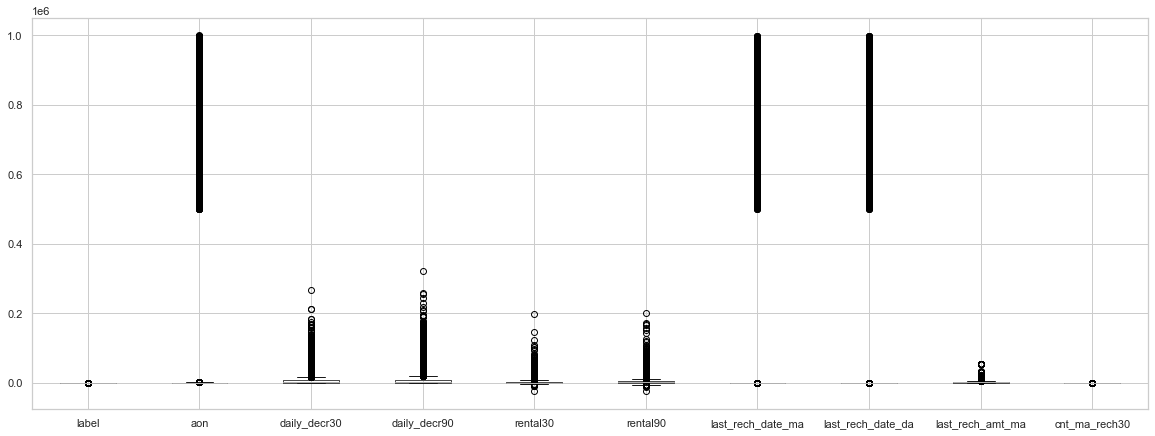

In [41]:
md.iloc[:,0:10].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.20)
plt.show()

In [42]:
md.iloc[:,10:20].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.20)
plt.show()

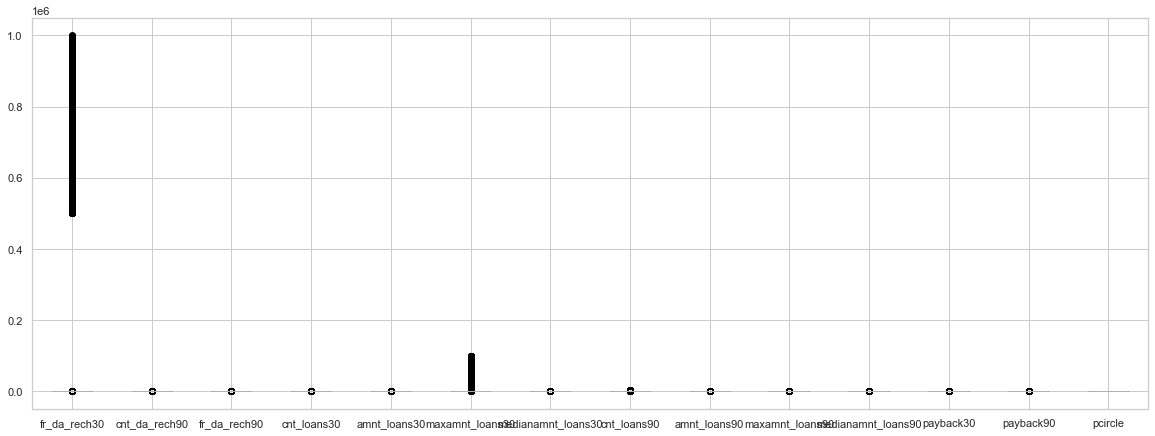

In [43]:
md.iloc[:,20:].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.20)
plt.show()

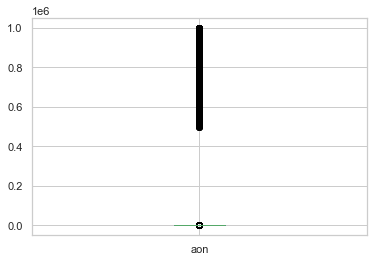

In [44]:
md['aon'].plot.box()

In [45]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(md))
z.shape

(209593, 34)

In [46]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [47]:
md_new=md[(z<3).all(axis=1)]
print(md.shape)
print(md_new.shape)

(209593, 34)
(0, 34)


In [48]:
mo=md.copy()

In [49]:
mo.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   pcircle  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 34 columns]

In [50]:
q1=mo.quantile(0.25)
q3=mo.quantile(0.75)
IQR=q3-q1

In [51]:
mo_new=mo[~((mo < (q1-1.5*IQR)) | (mo > (q3+1.5*IQR))).any(axis=1)]

In [52]:
print(mo.shape)
print(mo_new.shape)

(209593, 34)
(56628, 34)


In [53]:
loss=((209593-56628)/209593)*100
loss

72.98192210617721

In [54]:
x=mo.drop(['label'],axis=1)
y=mo['label']

In [55]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [56]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)

In [57]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.8765867622820461 on Random_state  1
Best Accuracy is  0.8765867622820461 on Random_state  1
Best Accuracy is  0.8765867622820461 on Random_state  1
Best Accuracy is  0.8765867622820461 on Random_state  1
Best Accuracy is  0.8765867622820461 on Random_state  1
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_state  6
Best Accuracy is  0.8777723158777434 on Random_s

Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_state  74
Best Accuracy is  0.877931353555215 on Random_st

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.28,random_state=74)

In [59]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8779116328999608
[[  207  7011]
 [  154 51315]]
              precision    recall  f1-score   support

           0       0.57      0.03      0.05      7218
           1       0.88      1.00      0.93     51469

    accuracy                           0.88     58687
   macro avg       0.73      0.51      0.49     58687
weighted avg       0.84      0.88      0.83     58687



In [60]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8655749995740113
[[ 3566  3652]
 [ 4237 47232]]
              precision    recall  f1-score   support

           0       0.46      0.49      0.47      7218
           1       0.93      0.92      0.92     51469

    accuracy                           0.87     58687
   macro avg       0.69      0.71      0.70     58687
weighted avg       0.87      0.87      0.87     58687



In [61]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.9043229335287202
[[ 2098  5120]
 [  495 50974]]
              precision    recall  f1-score   support

           0       0.81      0.29      0.43      7218
           1       0.91      0.99      0.95     51469

    accuracy                           0.90     58687
   macro avg       0.86      0.64      0.69     58687
weighted avg       0.90      0.90      0.88     58687



In [62]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)
predgn=gn.predict(x_test)
print(accuracy_score(y_test,predgn))
print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

0.7341489597355462
[[ 5530  1688]
 [13914 37555]]
              precision    recall  f1-score   support

           0       0.28      0.77      0.41      7218
           1       0.96      0.73      0.83     51469

    accuracy                           0.73     58687
   macro avg       0.62      0.75      0.62     58687
weighted avg       0.87      0.73      0.78     58687



In [63]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(lg,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8758021479745846


In [64]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dt,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8654296765201505


In [65]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ab,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.9035511676342225


In [66]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(gn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7354778113679148


minimum difference is accuracy and cross validation score is for DecisionTreeClassifier() so this is our best model.

In [68]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,10,15,20,25]}
sr=GridSearchCV(estimator=dt,param_grid=parameters,scoring='accuracy',cv=5)
sr.fit(x_train,y_train)
print(sr.best_params_)
print(sr.best_score_)

{'criterion': 'entropy', 'max_depth': 10}
0.9076312474738396


This project our best model DecisionTreeClassifier() and our model accuracy score improve 86.55% to 90.76%.

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

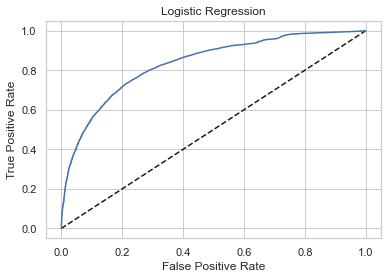

In [73]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [79]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.5128431059559906